# Data Exploration

We will perform skin classification. More specifically, when capturing a photograph, certain pixels correspond to human skin while others do not (for example, they may belong to a coffee mug or other objects). The objective of the machine learning task is to train a classifier that can accurately distinguish between skin pixels and non-skin pixels based on numerous examples. In a practical application, a digital camera could utilize this classifier as an initial step in detecting human faces, enabling it to focus on capturing clear images or avoid taking photos when individuals have their eyes closed.

The inputs are: 
 * r - How much red is in the pixel, an integer in [0, 255].
 * g - How much green is in the pixel, an integer in [0, 255].
 * b - How much blue is in the pixel, an integer in [0, 255].

The output is:
 * 0 - It is a background pixel.
 * 1 - It is skin.

 The data file (`Skin_NonSkin.txt`) is from http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

In [1]:
import numpy
import matplotlib.pyplot as plt

In [3]:
# Open the file
f = open('Skin_NonSkin.txt', 'r')

# Each line in the file is an exemplar, unless empty...
data = []
for line in f.readlines():
    parts = [int(v) for v in line.split()]
    if len(parts)==4:
        data.append(parts)

# Close file
f.close()

# Convert to numpy arrays.
data = numpy.array(data)

# input
in_r = data[:,2]
in_g = data[:,1]
in_b = data[:,0]

# output
out = data[:,3]
out[out==2] = 0

print(in_r)
# Print out how many exemplars were loaded and some very basic statistics...
print('Number of exemplars:', out.shape[0])
print('Number of background pixels =', (out==0).sum())
print('Number of skin pixels =', (out==1).sum())

[123 122 121 ... 112 112 255]
Number of exemplars: 245057
Number of background pixels = 194198
Number of skin pixels = 50859


# Split train and test data (50:50)

In [4]:
# This code generates the indices of exemplars for each kind...
index_bg = numpy.nonzero(out==0)[0] # bg is short for background.
index_skin = numpy.nonzero(out==1)[0]

# Split to get indices for each set...
half_bg = index_bg.shape[0] // 2
half_skin = index_skin.shape[0] // 2

index_train = numpy.concatenate((index_bg[:half_bg],index_skin[:half_skin]))
index_test = numpy.concatenate((index_bg[half_bg:],index_skin[half_skin:]))


# Now use the indices to generate the vectors of data for each case...
train_in_r = in_r[index_train]
train_in_g = in_g[index_train]
train_in_b = in_b[index_train]
train_out = out[index_train]

test_in_r = in_r[index_test]
test_in_g = in_g[index_test]
test_in_b = in_b[index_test]
test_out = out[index_test]

print(index_skin)

[    0     1     2 ... 50856 50857 50858]


# Basic Statistics

In [5]:
print('Global:')
print('  Red: mean =', numpy.mean(train_in_r), '| sd =', numpy.std(train_in_r))
print('  Green: mean =', numpy.mean(train_in_g), '| sd =', numpy.std(train_in_g))
print('  Blue: mean =', numpy.mean(train_in_b), '| sd =', numpy.std(train_in_b))
print('')

print('Background :')
print('  Red: mean =', numpy.mean(train_in_r[train_out==0]), '| sd =', numpy.std(train_in_r[train_out==0]))
print('  Green: mean =', numpy.mean(train_in_g[train_out==0]), '| sd =', numpy.std(train_in_g[train_out==0]))
print('  Blue: mean =', numpy.mean(train_in_b[train_out==0]), '| sd =', numpy.std(train_in_b[train_out==0]))
print('')

print('Skin:')
print('  Red: mean =', numpy.mean(train_in_r[train_out==1]), '| sd =', numpy.std(train_in_r[train_out==1]))
print('  Green: mean =', numpy.mean(train_in_g[train_out==1]), '| sd =', numpy.std(train_in_g[train_out==1]))
print('  Blue: mean =', numpy.mean(train_in_b[train_out==1]), '| sd =', numpy.std(train_in_b[train_out==1]))
print('')

Global:
  Red: mean = 114.88769913815618 | sd = 75.18217758110548
  Green: mean = 124.14228584486811 | sd = 64.75743226985364
  Blue: mean = 119.23729270044397 | sd = 66.73829385809498

Background :
  Red: mean = 94.66869895673487 | sd = 67.69313702726875
  Green: mean = 120.30854076767011 | sd = 68.59341818552605
  Blue: mean = 122.28493599316162 | sd = 70.65863369859589

Skin:
  Red: mean = 192.0926501238743 | sd = 47.07941024001938
  Green: mean = 138.78119469896575 | sd = 44.38303251625984
  Blue: mean = 107.60006292028785 | sd = 47.18406864719033



# Simplest Classifier

If r > 140, g > 120, and b < 120, then the pixel is skin

In [7]:
# A classification function.
def is_skin1(r, g, b):
  return r > 140 and g > 120 and b < 120 

# Code to test classificatuion performance on the test set...
estimate = numpy.array([is_skin1(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0* correct / float(test_in_r.shape[0])

print(percentage, '% correct')

86.47748696227016 % correct


# Visualisation


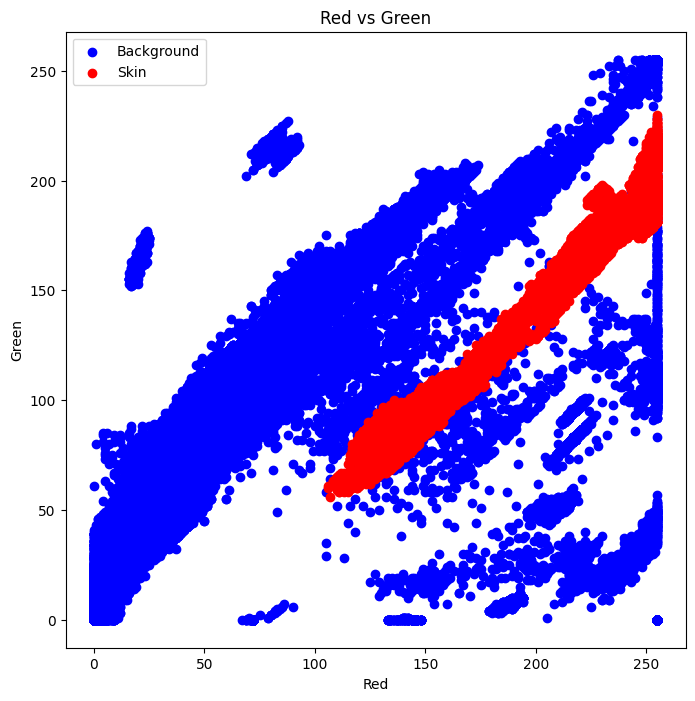

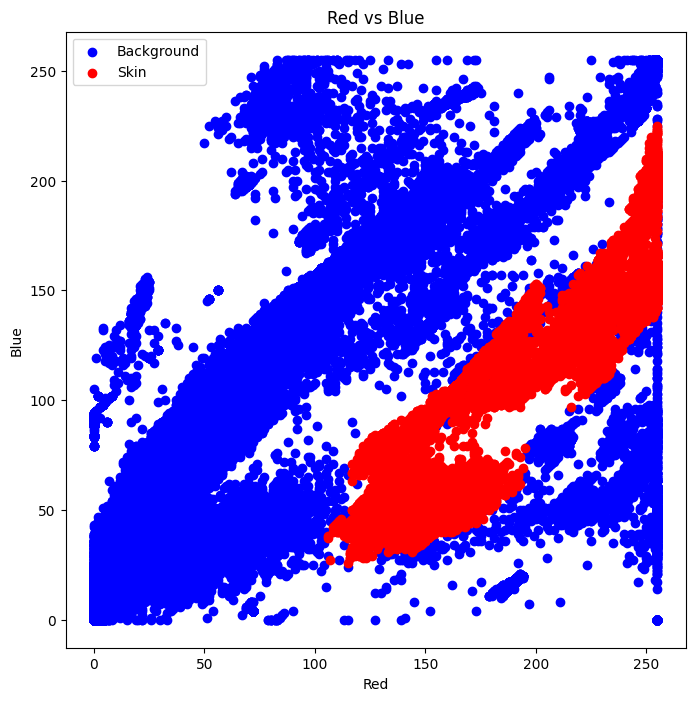

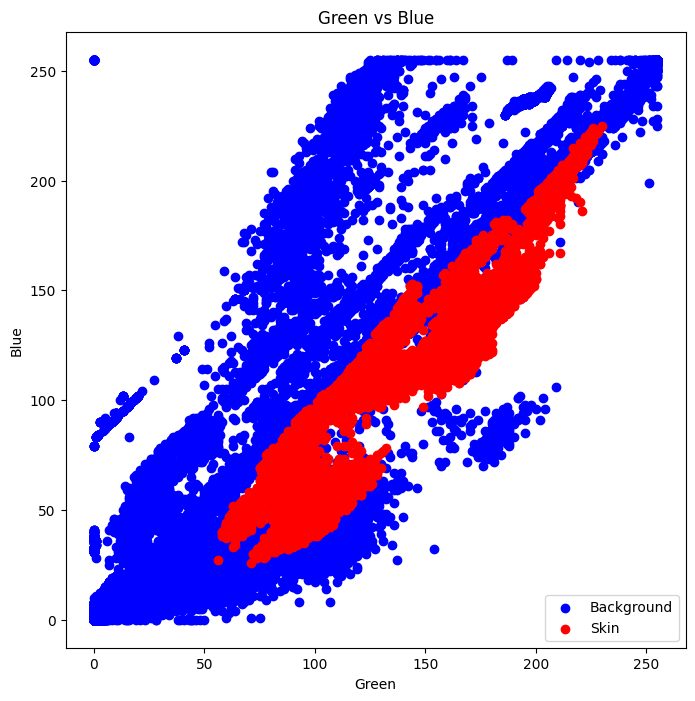

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(train_in_r[train_out==0], train_in_g[train_out==0], c='b', label='Background') # c='b' means blue, for background.
plt.scatter(train_in_r[train_out==1], train_in_g[train_out==1], c='r', label='Skin') # c='r' means red, for skin.
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('Red vs Green')
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(train_in_r[train_out==0], train_in_b[train_out==0], c='b', label='Background') # c='b' means blue, for background.
plt.scatter(train_in_r[train_out==1], train_in_b[train_out==1], c='r', label='Skin') # c='r' means red, for skin.
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Red vs Blue')
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(train_in_g[train_out==0], train_in_b[train_out==0], c='b', label='Background') # c='b' means blue, for background.
plt.scatter(train_in_g[train_out==1], train_in_b[train_out==1], c='r', label='Skin') # c='r' means red, for skin.
plt.xlabel('Green')
plt.ylabel('Blue')
plt.title('Green vs Blue')
plt.legend()
plt.show()

# Better Clasifier based on the graphs

In [16]:
# Transform feature
train_tform =train_in_r - train_in_g

# Print out simple statistics for your transformation of the data...

print('  train_tform: mean =', numpy.mean(train_tform[train_out==0]), '| sd =', numpy.std(train_tform[train_out==0]))
print('  train_tform: mean =', numpy.mean(train_tform[train_out==1]), '| sd =', numpy.std(train_tform[train_out==1]))
print('')

# Write a new and improved classifier - this will be the same as the transform
# above, but with the less than/greater than check and as an actual function...
def is_skin2(r, g, b):
    return (53-16)<r-g<(53+16)


# Code to test classification performance on the test set...
estimate = numpy.array([is_skin2(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print(percentage, '% correct')

  train_tform: mean = -25.63984181093523 | sd = 47.994891744319595
  train_tform: mean = 53.311455424908566 | sd = 8.342602224580162

92.5911416889063 % correct


# Machine Learning

In [17]:
# A new function to classify an input colour (r,g b) which is driven by the 5 parameters
def is_skin3(r, g, b, sr, sg, sb, ideal, threshold):
    return numpy.fabs(ideal-(r*sr + g*sg + b*sb))<threshold

# Score function
def score(sr, sg, sb, ideal, threshold):
    estimate = numpy.array([is_skin3(train_in_r[i], train_in_g[i], train_in_b[i], sr, sg, sb, ideal, threshold) for i in range(train_in_r.shape[0])])
    correct = (estimate==train_out).sum()
    percentage = 100.0 * correct / float(train_in_r.shape[0])
    
    return percentage

In [18]:
# Optimisation by blue force

def optimise():
  best_score = -1.0
  best_sr = None
  best_sg = None
  best_sb = None
  best_ideal = None
  best_threshold = None

  for sr in [-1.0, -0.5, 0.0, 0.5, 1.0]:
    x=numpy.linspace(-1.0, 1.0, 5)
    for sg in x:
      for sb in x:
        ideal = numpy.mean(train_in_r[train_out==1]*sr + train_in_g[train_out==1]*sg + train_in_b[train_out==1]*sb)
        std = numpy.std(train_in_r[train_out==1]*sr + train_in_g[train_out==1]*sg + train_in_b[train_out==1]*sb)
        for threshold in [std,std*2,std*3]:
            temp_score = score(sr, sg, sb, ideal, threshold)
            if temp_score > best_score:
                best_score = temp_score
                best_sr = sr
                best_sg = sg
                best_sb = sb
                best_ideal = ideal
                best_threshold = threshold
                print(temp_score)

    return best_sr, best_sg, best_sb, best_ideal, best_threshold


# Run above
best_sr, best_sg, best_sb, best_ideal, best_threshold = optimise()

# This code will judge the classifier your computer has learned
estimate = numpy.array([is_skin3(test_in_r[i], test_in_g[i], test_in_b[i], best_sr, best_sg, best_sb, best_ideal, best_threshold) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Final classifier:')
print('  sr =', best_sr)
print('  sg =', best_sg)
print('  sb =', best_sb)
print('  ideal =', best_ideal)
print('  threshold =', best_threshold)
print('')
print(percentage, '% correct')

45.57978584486811
46.4195938887438
47.01129537738313
50.22117393575346
61.063593627579
87.05520370854009
88.38796030295116
94.0429942543745
94.64938626273178
98.33425829198224
99.17977931574823
Final classifier:
  sr = -1.0
  sg = 0.5
  sb = 0.5
  ideal = -68.9020213142475
  threshold = 28.15283908726569

94.08140113768985 % correct
